In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import io
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from zipfile import ZipFile

In [2]:
zip_file_path = "/content/online_news_popularity.zip"
# Extract the CSV file from the zip
# Extract the CSV file from the zip
with ZipFile(zip_file_path, 'r') as zip_ref:
  # Get the names of all files in the zip
  file_names = zip_ref.namelist()

  # Find the CSV file name (assuming there's only one)
  csv_file = [name for name in file_names if name.endswith(".csv")][0]

  # Extract the CSV file to a temporary location (optional)
  # zip_ref.extract(csv_file)  # Uncomment if needed

  # Read the CSV data directly from the zip using ZipFile.open
  with zip_ref.open(csv_file) as csv_file:
    data = pd.read_csv(csv_file)

# Print the DataFrame head (first few rows)
print(data.head())

                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0     

In [ ]:
print(data.describe())

          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000      

In [3]:
# choose features and target
X = data.iloc[:, 2:60]  # all columns except url and target
y = data.iloc[:, -1].values.ravel()

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [5]:
linear_reg = LinearRegression()
logistic_reg = LogisticRegression()
lasso_reg = Lasso()
ridge_reg = Ridge()
random_forest_reg = RandomForestRegressor()

models = {
    "linear_reg" : linear_reg,
    "logistic_reg": logistic_reg,
    "lasso_reg": lasso_reg,
    "ridge_reg": ridge_reg,
    "random_forest_reg":random_forest_reg
}

In [6]:
param_grids = {
    "linear_reg": {},
    "logistic_reg": {"C": [0.1, 1, 10]},
    "lasso_reg": {"alpha": [0.1, 1, 10]},
    "ridge_reg": {"alpha": [0.1, 1, 10]},
    "random_forest_reg": {"n_estimators": [10, 50, 100]}
}

# Perform grid search with cross-validation for each model
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="neg_mean_squared_error")
    grid_search.fit(X_train, y_train)

    # Print the best parameters and score for each model
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params}")
    print(f"Best score (negative mean squared error): {best_score}")

    # Train the model with the best parameters on the entire training set
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Evaluate the model on the test set
    test_score = best_model.score(X_test, y_test)
    print(f"Test score: {test_score}")


Model: linear_reg
Best parameters: {}
Best score (negative mean squared error): -157843068.32818705
Test score: 0.014716422233365334


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu

Model: logistic_reg
Best parameters: {'C': 0.1}
Best score (negative mean squared error): -131106885.81478795


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score: 0.05435742212132678


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+12, tolerance: 3.657e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+12, tolerance: 3.248e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+12, tolerance: 3.010e

Model: lasso_reg
Best parameters: {'alpha': 10}
Best score (negative mean squared error): -134772690.83866498
Test score: 0.015497879266852976


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.48616e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.53479e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.5553e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.41667e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Model: ridge_reg
Best parameters: {'alpha': 0.1}
Best score (negative mean squared error): -180081126.5782509
Test score: 0.01471716570889725
Model: random_forest_reg
Best parameters: {'n_estimators': 50}
Best score (negative mean squared error): -139934689.6662972
Test score: -0.09628774466166812


In [14]:
accuracies_regr = {
    "linear_reg": {"best_score": -157843068.32818705, "test_score": 0.014716422233365334},
    "logistic_reg": {"best_score": -131106885.81478795, "test_score": 0.02497879266852976},
    "lasso_reg": {"best_score": -134772690.83866498, "test_score": 0.015497879266852976},
    "ridge_reg": {"best_score": -180081126.5782509, "test_score": 0.01471716570889725},
    "random_forest_reg": {"best_score": -139934689.6662972, "test_score": -0.09628774466166812},
}

mse_regr = {  # Assuming mse_regr holds the negative mean squared error values
    "linear_reg": -157843068.32818705,
    "logistic_reg": -131106885.81478795,
    "lasso_reg": -134772690.83866498,
    "ridge_reg": -180081126.5782509,
    "random_forest_reg": -139934689.6662972,
}

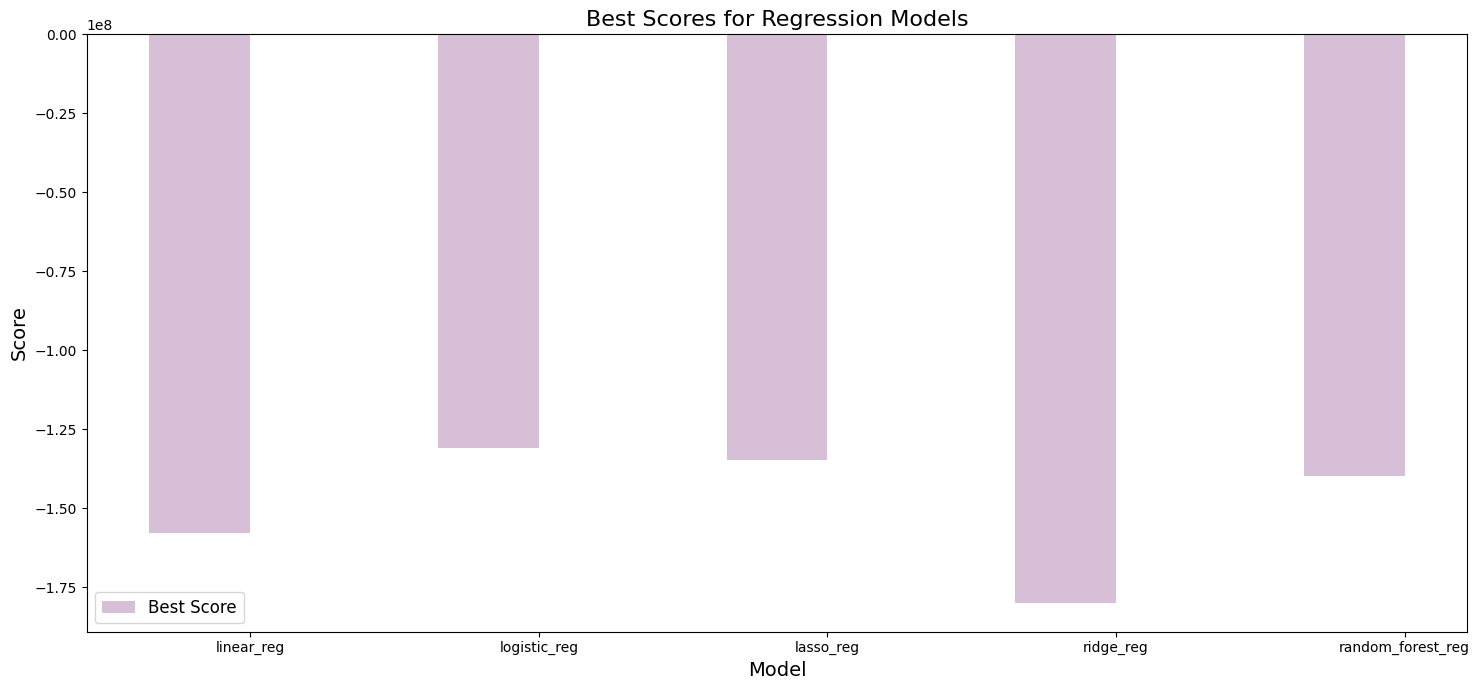

In [18]:
# prompt: draw  best & test score bar graph for the data

# Prepare data for the bar graph
model_names = list(accuracies_regr.keys())
best_scores = [accuracies_regr[model]["best_score"] for model in model_names]
test_scores = [accuracies_regr[model]["test_score"] for model in model_names]

# Create the bar graph
plt.figure(figsize=(15, 7))
width = 0.35
x_positions = np.arange(len(model_names))

plt.bar(x_positions - width/2, best_scores, width, label="Best Score", color="thistle")

plt.xticks(x_positions, model_names)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Best Scores for Regression Models", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


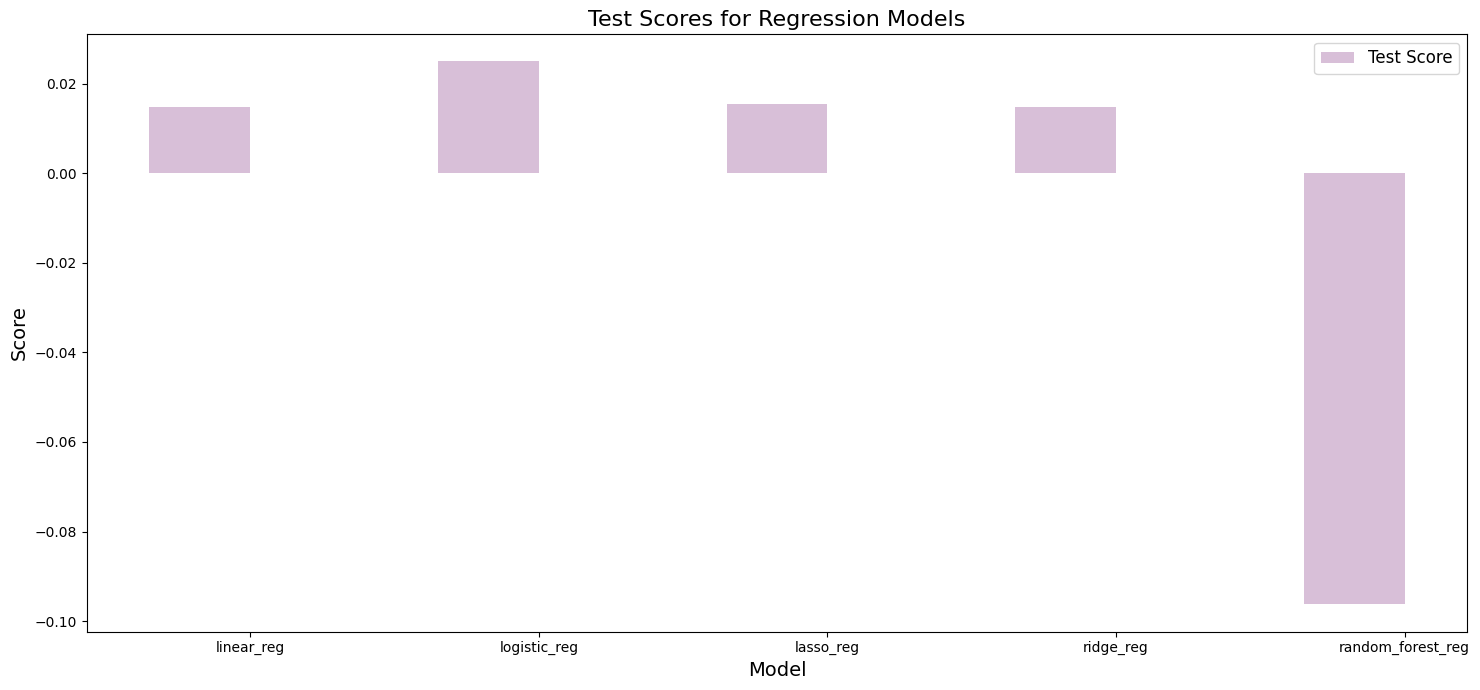

In [19]:
# Create the bar graph
plt.figure(figsize=(15, 7))
width = 0.35
x_positions = np.arange(len(model_names))

plt.bar(x_positions - width/2, test_scores, width, label="Test Score", color="thistle")

plt.xticks(x_positions, model_names)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Test Scores for Regression Models", fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

In [ ]:
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_

In [ ]:
# Hyperparameter tuning for Decision Tree
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

grid_search_dt = GridSearchCV(dt_clf, param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)

best_dt_clf = grid_search_dt.best_estimator_

# Hyperparameter tuning for KNN
param_grid = {
    'n_neighbors': range(1, 20),
}

grid_search_knn = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

best_knn_clf = grid_search_knn.best_estimator_

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': range(100, 200, 50),
    'max_features': range(5, 10, 5),
    'min_samples_leaf': range(50, 150, 50),
}

grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_

# Hyperparameter tuning for SGD
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
}

grid_search_sgd = GridSearchCV(sgd_clf, param_grid, cv=5)
grid_search_sgd.fit(X_train, y_train)

best_sgd_clf = grid_search_sgd.best_estimator_

# Hyperparameter tuning for Ridge
param_grid = {
    'alpha': [0.1, 1, 10, 100],
}

grid_search_rd = GridSearchCV(rd_clf, param_grid, cv=5)
grid_search_rd.fit(X_train, y_train)

best_rd_clf = grid_search_rd.best_estimator_

# Evaluate the optimized models
y_pred_dt = best_dt_clf.predict(X_test)
y_pred_knn = best_knn_clf.predict(X_test)
y_pred_rf = best_rf_clf.predict(X_test)
y_pred_sgd = best_sgd_clf.predict(X_test)
y_pred_rd = best_rd_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
accuracy_rd = accuracy_score(y_test, y_pred_rd)

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': range(100, 200, 50),
    'max_features': range(5, 10, 5),
    'min_samples_leaf': range(50, 150, 50),
}

grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)


In [ ]:
models = [
    {
        "model": "Decision Tree",
        "accuracy": accuracy_dt
    },
    {
        "model": "KNN",
        "accuracy": accuracy_knn
    },
    {
        "model": "Random Forest",
        "accuracy": accuracy_rf
    },
    {
        "model": "SGD",
        "accuracy": accuracy_sgd
    },
    {
        "model": "Ridge",
        "accuracy": accuracy_rd
    },
]
df_models = pd.DataFrame(models)

# Create a list of model names
model_names = [model['model'] for model in models]

# Create a list of accuracies
accuracies = [model['accuracy'] for model in models]

# Create a bar chart of the model names and accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)

# Add a title and labels to the chart
plt.title('Accuracies for Different Models (Classification)')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show the chart
plt.show()